<a href="https://colab.research.google.com/github/andrewyyip/stuff/blob/master/nflbowl_2021_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#import packages

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
plt.style.use('ggplot')

import numpy as np
import seaborn as sns


In [5]:
#read files
df_games = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/games.csv')
df_players = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/players.csv')
df_plays = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/plays.csv')
df_week1 = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/week1_merged.csv')
df_targets = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/targetedReceiver.csv')
df_covers = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/coverages_week1.csv')

#change column names
df_games.columns = [x.lower() for x in df_games.columns]
df_players.columns = [x.lower() for x in df_players.columns]
df_plays.columns = [x.lower() for x in df_plays.columns]
df_week1.columns = [x.lower() for x in df_week1.columns]
df_targets.columns = [x.lower() for x in df_targets.columns]
df_covers.columns = [x.lower() for x in df_covers.columns]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white', alpha = 0.7)
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(0, 54)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

# BASIC ANIMATION

In [22]:
test = df_week1[(df_week1.gameid == 2018090600) & (df_week1.playid == 190)]
test = test[['frameid', 'absoluteyardlinenumber', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef']]

In [23]:
test.head()

,frameid,absoluteyardlinenumber,x,y,s,a,dir,o,displayname,offdef
2184,1,49.0,54.30,29.58,0.18,0.11,254.04,285.29,Matt Ryan,offense
2185,1,49.0,46.90,22.13,1.03,0.52,273.82,103.25,Malcolm Jenkins,defense
2186,1,49.0,50.41,21.58,0.01,0.01,154.62,259.09,Julio Jones,offense
2187,1,49.0,35.39,24.49,1.45,0.94,221.61,97.59,Corey Graham,defense
2188,1,49.0,51.20,18.21,0.00,0.00,115.13,279.07,Mohamed Sanu,offense


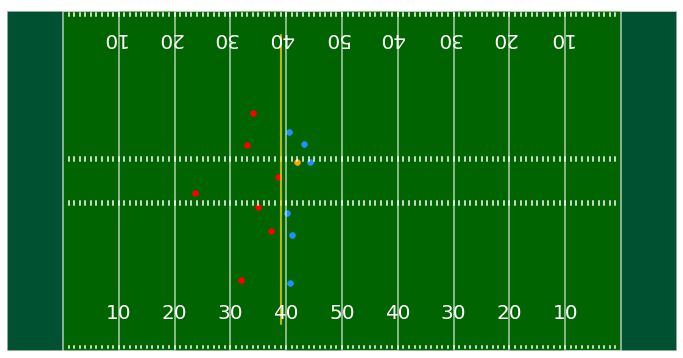

In [24]:
create_football_field()
plt.scatter(test[(test.offdef == 'offense') & (test.frameid == 15)].x, test[(test.offdef == 'offense') & (test.frameid == 15)].y, color = 'dodgerblue')
plt.scatter(test[(test.offdef == 'defense') & (test.frameid == 15)].x, test[(test.offdef == 'defense') & (test.frameid == 15)].y, color = 'red')
plt.scatter(test[(test.offdef == 'football') & (test.frameid == 15)].x, test[(test.offdef == 'football') & (test.frameid == 15)].y, color = 'orange')
plt.axvline(test.absoluteyardlinenumber.values[0], color = 'gold', ymax = 53.3/58, ymin = 5/63.3)


In [25]:
offense =  test[test.offdef == 'offense']
defense = test[test.offdef == 'defense']
football = test[test.offdef == 'football']

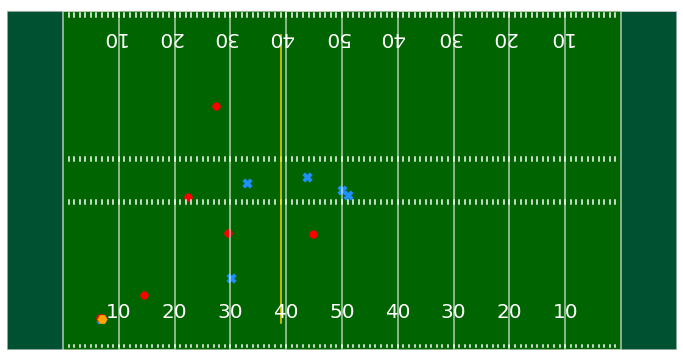

In [26]:
from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()

scat_offense = ax.scatter(offense[offense.frameid == 1].x, offense[offense.frameid == 1].y, color = 'dodgerblue', s = 90, marker = 'X')
scat_defense = ax.scatter(defense[defense.frameid == 1].x, defense[defense.frameid == 1].y, color = 'red', s = 60)
scat_football = ax.scatter(football[football.frameid == 1].x, football[football.frameid == 1].y, color = 'orange', s = 90, marker = 'H')
plt.axvline(test.absoluteyardlinenumber.values[0], color = 'gold', ymax = 53.3/58, ymin = 5/63.3)

def animate_basic(fr):
  scat_offense.set_offsets(np.c_[offense[offense.frameid == fr].x.values, offense[offense.frameid == fr].y.values])  
  scat_defense.set_offsets(np.c_[defense[defense.frameid == fr].x.values, defense[defense.frameid == fr].y.values])  
  scat_football.set_offsets(np.c_[football[football.frameid == fr].x.values, football[football.frameid == fr].y.values]) 

HTML(animation.FuncAnimation(fig, animate_basic, frames=test.frameid.max(), interval = 100, repeat=True).to_html5_video())


# DEFENDER CLOSE OUTS

In [433]:
df_week1.head()

,time,x,y,s,a,dis,o,dir,event,nflid,displayname,jerseynumber,position,frameid,team,gameid,playid,playdirection,route,gamedate,gametimeeastern,hometeamabbr,visitorteamabbr,week,playdescription,quarter,down,yardstogo,possessionteam,playtype,yardlineside,yardlinenumber,offenseformation,personnelo,defendersinthebox,numberofpassrushers,personneld,typedropback,presnapvisitorscore,presnaphomescore,gameclock,absoluteyardlinenumber,penaltycodes,penaltyjerseynumbers,passresult,offenseplayresult,playresult,epa,isdefensivepi,offdef,xmod,position_color,targetnflid
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,ATL,2018090600,75,left,NaN,09/06/2018,20:20:00,PHI,ATL,1,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,offense,-1.73,dline,2495454.0
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,PHI,2018090600,75,left,NaN,09/06/2018,20:20:00,PHI,ATL,1,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,defense,1.11,dback,2495454.0
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,ATL,2018090600,75,left,HITCH,09/06/2018,20:20:00,PHI,ATL,1,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,offense,-1.35,dline,2495454.0
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,PHI,2018090600,75,left,NaN,09/06/2018,20:20:00,PHI,ATL,1,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,defense,3.69,dback,2495454.0
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,ATL,2018090600,75,left,HITCH,09/06/2018,20:20:00,PHI,ATL,1,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,offense,-0.78,dline,2495454.0


In [449]:
df_week1 = pd.merge(df_week1, df_targets, how = 'left', on = ['gameid', 'playid'])

In [450]:
defense_xy = df_week1[df_week1.offdef == 'defense'][['gameid', 'playid', 'frameid', 'event', 'nflid', 'displayname', 'position', 'x', 'y']]
defense_xy.head()

,gameid,playid,frameid,event,nflid,displayname,position,x,y
1,2018090600,75,1,None,79848.0,Malcolm Jenkins,SS,88.89,36.47
3,2018090600,75,1,None,2495613.0,Corey Graham,FS,86.31,22.01
5,2018090600,75,1,None,2534832.0,Rodney McLeod,FS,73.64,28.70
7,2018090600,75,1,None,2552315.0,Jordan Hicks,MLB,86.48,31.12
8,2018090600,75,1,None,2552689.0,Ronald Darby,CB,82.67,20.53


In [451]:
targets_xy = df_week1[df_week1.targetnflid == df_week1.nflid][['gameid', 'playid', 'frameid', 'targetnflid', 'displayname', 'position', 'x', 'y']]
targets_xy.rename(columns = {'displayname':'targetname', 'x':'targetx', 'y':'targety'}, inplace=True)
targets_xy.head()

,gameid,playid,frameid,targetnflid,targetname,position,targetx,targety
2,2018090600,75,1,2495454.0,Julio Jones,WR,91.35,44.16
16,2018090600,75,2,2495454.0,Julio Jones,WR,91.37,44.17
30,2018090600,75,3,2495454.0,Julio Jones,WR,91.37,44.17
44,2018090600,75,4,2495454.0,Julio Jones,WR,91.37,44.17
58,2018090600,75,5,2495454.0,Julio Jones,WR,91.37,44.16


In [452]:
df_xy = pd.merge(defense_xy, targets_xy, how = 'left', on = ['gameid', 'playid', 'frameid'])

In [453]:
df_xy['d_target'] = df_xy.apply(lambda x: np.linalg.norm(np.array([x.x,x.y]) - np.array([x.targetx, x.targety])), axis = 1)

In [454]:
df_xy.head(8)

,gameid,playid,frameid,event,nflid,displayname,position_x,x,y,targetnflid,targetname,position_y,targetx,targety,d_target
0,2018090600,75,1,None,79848.0,Malcolm Jenkins,SS,88.89,36.47,2495454.0,Julio Jones,WR,91.35,44.16,8.073890
1,2018090600,75,1,None,2495613.0,Corey Graham,FS,86.31,22.01,2495454.0,Julio Jones,WR,91.35,44.16,22.716164
2,2018090600,75,1,None,2534832.0,Rodney McLeod,FS,73.64,28.70,2495454.0,Julio Jones,WR,91.35,44.16,23.508630
3,2018090600,75,1,None,2552315.0,Jordan Hicks,MLB,86.48,31.12,2495454.0,Julio Jones,WR,91.35,44.16,13.919716
4,2018090600,75,1,None,2552689.0,Ronald Darby,CB,82.67,20.53,2495454.0,Julio Jones,WR,91.35,44.16,25.173782
5,2018090600,75,1,None,2555383.0,Jalen Mills,CB,84.00,43.49,2495454.0,Julio Jones,WR,91.35,44.16,7.380474
6,2018090600,75,1,None,2558175.0,Nate Gerry,LB,85.63,26.59,2495454.0,Julio Jones,WR,91.35,44.16,18.477643
7,2018090600,75,2,None,79848.0,Malcolm Jenkins,SS,88.89,36.47,2495454.0,Julio Jones,WR,91.37,44.17,8.089524


In [455]:
df_xy.dropna(inplace=True)

In [456]:
df_closest_defender = df_xy.loc[df_xy.groupby(['gameid', 'playid', 'frameid']).d_target.idxmin()]
df_closest_defender.rename(columns = {'position_x':'def_position', 'position_y':'off_position'}, inplace=True)

In [457]:
df_closest_defender.head()

,gameid,playid,frameid,event,nflid,displayname,def_position,x,y,targetnflid,targetname,off_position,targetx,targety,d_target
5,2018090600,75,1,None,2555383.0,Jalen Mills,CB,84.00,43.49,2495454.0,Julio Jones,WR,91.35,44.16,7.380474
12,2018090600,75,2,None,2555383.0,Jalen Mills,CB,84.02,43.49,2495454.0,Julio Jones,WR,91.37,44.17,7.381389
19,2018090600,75,3,None,2555383.0,Jalen Mills,CB,84.03,43.49,2495454.0,Julio Jones,WR,91.37,44.17,7.371431
26,2018090600,75,4,None,2555383.0,Jalen Mills,CB,84.03,43.48,2495454.0,Julio Jones,WR,91.37,44.17,7.372361
33,2018090600,75,5,None,2555383.0,Jalen Mills,CB,84.02,43.48,2495454.0,Julio Jones,WR,91.37,44.16,7.381389


In [458]:
#take the defender closest to the target receiver, and measure the distance between the two players
#take the same defender and measure the distance between them and the target receiver at the point the pass is caught/incomplete
#the difference between the two distance measure will indicate how well the defender is able to close in on the target receiver once the ball is in the air
pass_forward_pass_arrived = pd.merge(df_closest_defender[df_closest_defender.event == 'pass_forward'], df_xy[df_xy.event.isin(['pass_outcome_caught', 'pass_outcome_incomplete'])], how = 'left', on = ['gameid', 'playid', 'displayname'])
pass_forward_pass_arrived.head()

,gameid,playid,frameid_x,event_x,nflid_x,displayname,def_position,x_x,y_x,targetnflid_x,targetname_x,off_position,targetx_x,targety_x,d_target_x,frameid_y,event_y,nflid_y,position_x,x_y,y_y,targetnflid_y,targetname_y,position_y,targetx_y,targety_y,d_target_y
0,2018090600,75,36,pass_forward,2555383.0,Jalen Mills,CB,76.53,44.93,2495454.0,Julio Jones,WR,80.69,44.91,4.160048,52.0,pass_outcome_caught,2555383.0,CB,75.30,49.33,2495454.0,Julio Jones,WR,81.48,50.13,6.231565
1,2018090600,146,31,pass_forward,79848.0,Malcolm Jenkins,SS,46.18,41.10,2560854.0,Calvin Ridley,WR,45.51,36.91,4.243230,48.0,pass_outcome_incomplete,79848.0,SS,42.12,48.93,2560854.0,Calvin Ridley,WR,47.25,37.10,12.894410
2,2018090600,168,34,pass_forward,2557958.0,Sidney Jones,CB,46.59,12.67,2543583.0,Devonta Freeman,RB,51.83,13.69,5.338352,47.0,pass_outcome_incomplete,2557958.0,CB,50.81,9.45,2543583.0,Devonta Freeman,RB,51.90,10.22,1.334541
3,2018090600,190,39,pass_forward,79848.0,Malcolm Jenkins,SS,39.77,22.27,2495454.0,Julio Jones,WR,35.70,21.07,4.243218,62.0,pass_outcome_caught,79848.0,SS,34.96,25.14,2495454.0,Julio Jones,WR,22.84,8.70,20.424691
4,2018090600,256,31,pass_forward,2558175.0,Nate Gerry,LB,8.20,33.31,2543583.0,Devonta Freeman,RB,9.17,35.20,2.124382,46.0,pass_outcome_incomplete,2558175.0,LB,9.26,42.48,2543583.0,Devonta Freeman,RB,9.12,44.12,1.645965


In [459]:
pass_forward_pass_arrived['closeout'] = pass_forward_pass_arrived.apply(lambda x: x.d_target_x - x.d_target_y, axis = 1)
pass_forward_pass_arrived['closeout_frames'] = pass_forward_pass_arrived.apply(lambda x: x.frameid_y - x.frameid_x, axis = 1)
pass_forward_pass_arrived['closeout_speed'] = pass_forward_pass_arrived.apply(lambda x: x.closeout / x.closeout_frames * 10, axis = 1)
pass_forward_pass_arrived = pass_forward_pass_arrived[['gameid', 'playid', 'nflid_x', 'displayname', 'def_position', 'targetnflid_x', 'targetname_x', 'off_position', 'event_y','closeout', 'closeout_frames', 'closeout_speed']]

In [460]:
pass_forward_pass_arrived.head(10).round(2)

,gameid,playid,nflid_x,displayname,def_position,targetnflid_x,targetname_x,off_position,event_y,closeout,closeout_frames,closeout_speed
0,2018090600,75,2555383.0,Jalen Mills,CB,2495454.0,Julio Jones,WR,pass_outcome_caught,-2.07,16.0,-1.29
1,2018090600,146,79848.0,Malcolm Jenkins,SS,2560854.0,Calvin Ridley,WR,pass_outcome_incomplete,-8.65,17.0,-5.09
2,2018090600,168,2557958.0,Sidney Jones,CB,2543583.0,Devonta Freeman,RB,pass_outcome_incomplete,4.00,13.0,3.08
3,2018090600,190,79848.0,Malcolm Jenkins,SS,2495454.0,Julio Jones,WR,pass_outcome_caught,-16.18,23.0,-7.04
4,2018090600,256,2558175.0,Nate Gerry,LB,2543583.0,Devonta Freeman,RB,pass_outcome_incomplete,0.48,15.0,0.32
5,2018090600,320,2539653.0,Robert Alford,CB,2552600.0,Nelson Agholor,WR,pass_outcome_caught,3.39,12.0,2.82
6,2018090600,344,2543850.0,Ricardo Allen,SS,2506467.0,Darren Sproles,RB,pass_outcome_incomplete,0.90,10.0,0.90
7,2018090600,402,2552689.0,Ronald Darby,CB,2533040.0,Mohamed Sanu,WR,pass_outcome_incomplete,2.81,18.0,1.56
8,2018090600,492,2552315.0,Jordan Hicks,MLB,2552453.0,Tevin Coleman,RB,pass_outcome_caught,-1.90,19.0,-1.00
9,2018090600,521,2558175.0,Nate Gerry,LB,2555415.0,Austin Hooper,TE,pass_outcome_caught,2.05,8.0,2.56


In [485]:
pass_forward_pass_arrived.def_position.value_counts()

CB     437
OLB    140
ILB    110
FS      79
SS      70
MLB     52
LB      37
DB      18
S        1
Name: def_position, dtype: int64

## DEFENDERS (WEEK 1)


Top cornerbacks in terms of closing the distance between him and the target receiver

min 5 targets

In [368]:
x = pass_forward_pass_arrived[pass_forward_pass_arrived.def_position == 'CB'].groupby('displayname')[['closeout', 'closeout_speed']].agg(['count', 'mean'])
x.columns = ['_'.join(col) for col in x.columns]
x[x.closeout_count > 5].sort_values(by = 'closeout_mean', ascending = False)[['closeout_mean', 'closeout_speed_mean']].head(10).round(2)

,closeout_mean,closeout_speed_mean
displayname,,
Marlon Humphrey,2.44,1.72
Johnathan Joseph,2.32,2.33
Bobby McCain,2.18,1.66
Robert Alford,1.84,1.42
Jalen Mills,1.58,1.03
Ronald Darby,1.36,0.82
Terrance Mitchell,1.35,0.91
Carlton Davis,1.33,0.95
Stephon Gilmore,1.20,1.24


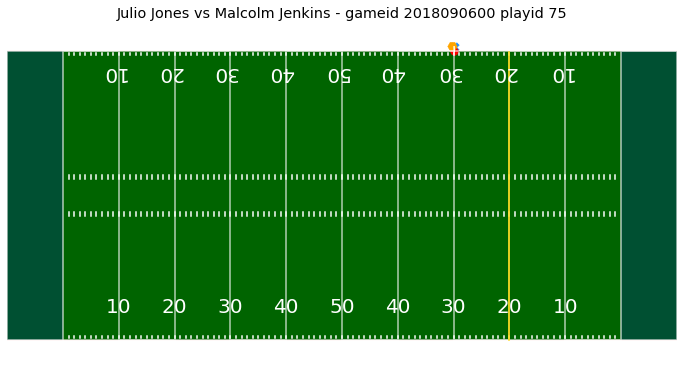

In [250]:
test = df_week1[(df_week1.gameid == 2018090600) & (df_week1.playid == 75)]
test = test[['frameid', 'absoluteyardlinenumber', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef']]
offense =  test[test.offdef == 'offense']
offense = offense[offense.displayname == 'Julio Jones']
defense = test[test.offdef == 'defense']
defense = defense[defense.displayname == 'Malcolm Jenkins']
football = test[test.offdef == 'football']

from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()

scat_offense = ax.scatter(offense[offense.frameid == 1].x, offense[offense.frameid == 1].y, color = 'dodgerblue', s = 90, marker = 'X')
scat_defense = ax.scatter(defense[defense.frameid == 1].x, defense[defense.frameid == 1].y, color = 'red', s = 60)
scat_football = ax.scatter(football[football.frameid == 1].x, football[football.frameid == 1].y, color = 'orange', s = 90, marker = 'H')

distance_line, = ax.plot([offense[offense.frameid == 1].x.values, defense[defense.frameid == 1].x.values], [offense[offense.frameid == 1].y.values, defense[defense.frameid == 1].y.values], color = 'white', animated=True)

plt.title('Julio Jones vs Malcolm Jenkins - gameid 2018090600 playid 75')
plt.axvline(test.absoluteyardlinenumber.values[0], color = 'gold', ymax = 53.3/58, ymin = 5/63.3)

def animate_basic(fr):
  scat_offense.set_offsets(np.c_[offense[offense.frameid == fr].x.values, offense[offense.frameid == fr].y.values])  
  scat_defense.set_offsets(np.c_[defense[defense.frameid == fr].x.values, defense[defense.frameid == fr].y.values])  
  scat_football.set_offsets(np.c_[football[football.frameid == fr].x.values, football[football.frameid == fr].y.values]) 
  x = [offense[offense.frameid == fr].x.values, defense[defense.frameid == fr].x.values]
  y = [offense[offense.frameid == fr].y.values, defense[defense.frameid == fr].y.values]
  distance_line.set_data(x, y)

HTML(animation.FuncAnimation(fig, animate_basic, frames=test.frameid.max(), interval = 100, repeat=True).to_html5_video())

Top cornerbacks in terms of pass completed percentage (lower = better) 

min 5 targets

In [369]:
x = pass_forward_pass_arrived[pass_forward_pass_arrived.def_position == 'CB'].groupby('displayname')[['event_y', 'closeout']].agg({'event_y':[lambda x: x.value_counts().sort_index()[:1], 'count'], 'closeout':'mean'})
x.columns = ['pass_complete', 'count', 'closeout_mean']
x['complete_p'] = x.apply(lambda x: (x.pass_complete / x['count']).round(2), axis = 1)
x.sort_values(by = 'complete_p').head(10)

,pass_complete,count,closeout_mean,complete_p
displayname,,,,
Terrance Mitchell,1,8,1.349065,0.12
Bobby McCain,1,7,2.178146,0.14
Marlon Humphrey,1,6,2.435886,0.17
Eli Apple,1,5,-0.147640,0.2
Ronald Darby,2,10,1.360350,0.2
Jonathan Jones,1,5,2.145662,0.2
Rashaan Melvin,1,5,-0.305869,0.2
Jaire Alexander,1,4,1.155052,0.25
Ryan Smith,1,3,3.188641,0.33


##DEFENDERS (ALL WEEKS)


In [264]:
import os
filenames = os.listdir('/content/gdrive/My Drive/NFL/NFLbowl-2021/data')
weekly_filenames = ['week1.csv','week2.csv','week3.csv','week4.csv','week5.csv','week6.csv','week7.csv','week8.csv','week9.csv','week10.csv','week11.csv',
                    'week12.csv','week13.csv','week14.csv','week15.csv','week16.csv','week17.csv']

In [469]:
def get_weekly_data(week):  
  #clean weekly tracking data
  data = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/' + week)
  data.columns = [x.lower() for x in data.columns]

  data = pd.merge(data, df_games, how = 'left', on = 'gameid')
  data = pd.merge(data, df_plays, how = 'left', on = ['gameid', 'playid'])

  data.team = data.apply(lambda x: x.hometeamabbr if x.team == 'home' else x.visitorteamabbr, axis = 1)

  def offdef_function(row):
    if row.team == row.possessionteam:
      return 'offense'
    else:
      return 'defense'

  data['offdef'] = data.apply(offdef_function, axis = 1)

  #data.drop(columns = ['jerseynumber', 'playdirection', 'gamedate', 'gametimeeastern', 'hometeamabbr', 'visitorteamabbr', 'week', 'playdescription'], inplace=True)
  data = pd.merge(data, df_targets, how = 'left', on = ['gameid', 'playid'])

  #get x-y tracking for defenders
  defense_xy = data[data.offdef == 'defense'][['gameid', 'playid', 'frameid', 'event', 'nflid', 'displayname', 'position', 'x', 'y']]

  #get xy tracking for target receivers
  targets_xy = data[data.targetnflid == data.nflid][['gameid', 'playid', 'frameid', 'targetnflid', 'displayname', 'position', 'x', 'y']]
  targets_xy.rename(columns = {'displayname':'targetname', 'x':'targetx', 'y':'targety'}, inplace=True)

  #merge defender xy tracking and target xy tracking 
  df_xy = pd.merge(defense_xy, targets_xy, how = 'left', on = ['gameid', 'playid', 'frameid'])

  #get distance between defenders and target receiver
  df_xy['d_target'] = df_xy.apply(lambda x: np.linalg.norm(np.array([x.x,x.y]) - np.array([x.targetx, x.targety])), axis = 1)
  df_xy.dropna(inplace=True)

  #find defender with the min distance to target receiver throughout each play
  df_closest_defender = df_xy.loc[df_xy.groupby(['gameid', 'playid', 'frameid']).d_target.idxmin()]
  df_closest_defender.rename(columns = {'position_x':'def_position', 'position_y':'off_position'}, inplace=True)

  #get closest defender at the pass_forward moment in a play, and look at how closely that defender sticks to the target receiver
  #assumes the closest defender to the target receiver at the moment pass_forward occurs is the defender covering the target receiver
  pass_forward_pass_arrived = pd.merge(df_closest_defender[df_closest_defender.event == 'pass_forward'], df_xy[df_xy.event.isin(['pass_outcome_caught', 'pass_outcome_incomplete'])], how = 'left', on = ['gameid', 'playid', 'displayname'])

  #find difference between distances as 'closeout' distance gained/lost
  pass_forward_pass_arrived['closeout'] = pass_forward_pass_arrived.apply(lambda x: x.d_target_x - x.d_target_y, axis = 1)
  pass_forward_pass_arrived['closeout_frames'] = pass_forward_pass_arrived.apply(lambda x: x.frameid_y - x.frameid_x, axis = 1)
  pass_forward_pass_arrived['closeout_speed'] = pass_forward_pass_arrived.apply(lambda x: x.closeout / x.closeout_frames * 10, axis = 1)
  pass_forward_pass_arrived = pass_forward_pass_arrived[['gameid', 'playid', 'nflid_x', 'displayname', 'def_position', 'targetnflid_x', 'targetname_x', 'off_position', 'event_y','closeout', 'closeout_frames', 'closeout_speed']]

  return pass_forward_pass_arrived

In [472]:
df_list = []
for week in weekly_filenames:
  df_list.append(get_weekly_data(week))

In [476]:
df = pd.concat(df_list)

In [608]:
df.to_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/closest_defender_at_pass_forward.csv', index=False)

In [138]:
df = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/closest_defender_at_pass_forward.csv')


Top 10 overall defenders by distance closed on target receiver

Assumes closest defender at the time the pass is thrown forward is the defender covering the target receiver

Min 20 plays



In [139]:
x = df.groupby('displayname')[['closeout', 'closeout_speed']].agg(['count', 'mean'])
x.columns = ['_'.join(col) for col in x.columns]
x[x.closeout_count > 20].sort_values(by = 'closeout_mean', ascending = False)[['closeout_mean', 'closeout_speed_mean']].head(10).round(2)

,closeout_mean,closeout_speed_mean
displayname,,
Devin McCourty,2.20,1.71
Sidney Jones,1.90,1.71
Adrian Amos,1.84,1.87
Clayton Geathers,1.77,1.86
Johnathan Joseph,1.76,1.50
Elijah Lee,1.54,1.37
Nigel Bradham,1.51,1.50
Leighton Vander Esch,1.50,1.50
Donte Jackson,1.50,1.25


Safeties and Cornerbacks have different defensive responsibilities, so it might help to separate the two.

Top Cornerbacks by distance gained on target receiver

Min 20 plays

In [240]:
x = df[df.def_position == 'CB'].groupby('displayname')[['closeout', 'closeout_speed']].agg(['count', 'mean'])
x.columns = ['_'.join(col) for col in x.columns]
x[x.closeout_count > 20].sort_values(by = 'closeout_mean', ascending = False)[['closeout_mean', 'closeout_speed_mean']].head(10).round(2)

,closeout_mean,closeout_speed_mean
displayname,,
Sidney Jones,1.90,1.71
Johnathan Joseph,1.76,1.50
Avonte Maddox,1.47,1.02
Ryan Smith,1.36,1.11
Damarious Randall,1.32,0.90
James Bradberry,1.31,0.96
Jalen Mills,1.31,0.84
Aqib Talib,1.29,0.94
Michael Davis,1.28,0.95


Top Cornerbacks by pass defended percentages

Min 20 plays

In [147]:
x = df[df.def_position == 'CB'].groupby('displayname')[['event_y', 'closeout']].agg({'event_y':[lambda x: x.value_counts().sort_index(ascending = False)[0:1], 'count'], 'closeout':'mean'})
x.columns = ['incomplete_pass', 'attempts', 'closeout_mean']
x['p'] = x.apply(lambda x: (x.incomplete_pass / x['attempts']).round(2), axis = 1)
x[x['attempts']>20].sort_values(by = 'p', ascending = False)[['incomplete_pass', 'attempts', 'p']].head(10)

,incomplete_pass,attempts,p
displayname,,,
Marlon Humphrey,42,72,0.58
Darius Slay,44,77,0.57
Stephon Gilmore,48,86,0.56
Orlando Scandrick,47,86,0.55
Steven Nelson,56,103,0.54
William Jackson,37,70,0.53
Dre Kirkpatrick,35,67,0.52
Tramaine Brock,20,39,0.51
Denzel Ward,44,86,0.51


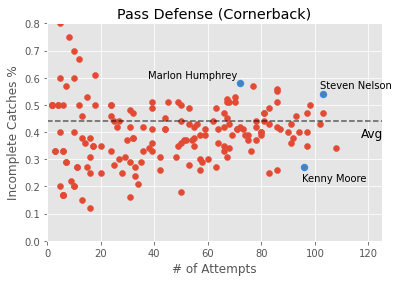

In [148]:
plt.xlim(0, 125)
plt.ylim(0,0.8)
plt.scatter(x['attempts'], x['p'])
plt.plot([0, 130], [x.p.mean(), x.p.mean()], '--', color = 'black', alpha = 0.6)
plt.text(117, x.p.mean()-0.06, s = 'Avg', fontsize = 12)
plt.xlabel('# of Attempts')
plt.ylabel('Incomplete Catches %')
plt.title('Pass Defense (Cornerback)')
plt.text(x[x.index == 'Steven Nelson']['attempts']-1, x[x.index == 'Steven Nelson'].p + 0.02, 'Steven Nelson')
plt.text(x[x.index == 'Kenny Moore']['attempts']-1, x[x.index == 'Kenny Moore'].p - 0.05, 'Kenny Moore')
plt.text(x[x.index == 'Marlon Humphrey']['attempts']-1, x[x.index == 'Marlon Humphrey'].p + 0.02, 'Marlon Humphrey', horizontalalignment = 'right')
plt.scatter([x[x.index == 'Steven Nelson']['attempts'],x[x.index == 'Kenny Moore']['attempts'],  x[x.index == 'Marlon Humphrey']['attempts']], 
            [x[x.index == 'Steven Nelson'].p, x[x.index == 'Kenny Moore'].p, x[x.index == 'Marlon Humphrey'].p], edgecolor ='dodgerblue', marker = 'o', linewidth = 1.5, alpha = 0.8)

Top Safety by avg distance gained on target receiver

min 20 plays

In [243]:
x = df[df.def_position.isin(['FS', 'SS', 'S'])].groupby('displayname')[['closeout', 'closeout_speed']].agg(['count', 'mean'])
x.columns = ['_'.join(col) for col in x.columns]
x[x.closeout_count > 20].sort_values(by = 'closeout_mean', ascending = False)[['closeout_mean', 'closeout_speed_mean']].head(10).round(2)

,closeout_mean,closeout_speed_mean
displayname,,
Devin McCourty,2.20,1.71
Adrian Amos,1.84,1.87
Clayton Geathers,1.77,1.86
Harrison Smith,1.35,1.12
Derwin James,1.30,1.45
Tony Jefferson,1.12,0.07
John Johnson,0.97,0.76
Marqui Christian,0.91,0.89
Michael Thomas,0.90,1.15


Top Safety by pass defended percentages

min 20 plays

In [143]:
x = df[df.def_position.isin(['FS', 'SS', 'S'])].groupby('displayname')[['event_y', 'closeout']].agg({'event_y':[lambda x: x.value_counts().sort_index(ascending = False)[:1], 'count'], 'closeout':'mean'})
x.columns = ['incomplete_pass', 'attempts', 'closeout_mean']
x['p'] = x.apply(lambda x: (x.incomplete_pass / x['attempts']).round(2), axis = 1)
x.dropna(axis = 0, inplace=True)
x[x['attempts']>20].sort_values(by = 'p', ascending = False)[['incomplete_pass', 'attempts', 'p']].head(10)

,incomplete_pass,attempts,p
displayname,,,
Tre Boston,14,23,0.61
Barry Church,14,26,0.54
Kevin Byard,13,24,0.54
Jamal Adams,25,47,0.53
Eric Weddle,12,23,0.52
Adrian Phillips,24,47,0.51
Tony Jefferson,14,30,0.47
Minkah Fitzpatrick,23,49,0.47
Morgan Burnett,14,30,0.47


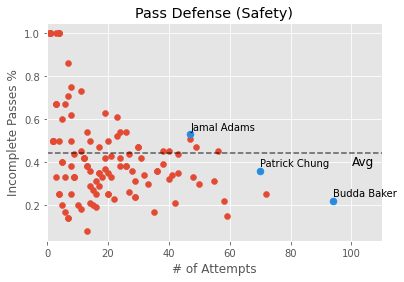

In [144]:
plt.xlim(0, 110)
plt.scatter(x['attempts'], x['p'])
plt.plot([0, 110], [x.p.mean(), x.p.mean()], '--', color = 'black', alpha = 0.6)
plt.text(100, x.p.mean()-0.06, s = 'Avg', fontsize = 12)
plt.xlabel('# of Attempts')
plt.ylabel('Incomplete Passes %')
plt.title('Pass Defense (Safety)')

plt.annotate('Budda Baker', (x[x.index == 'Budda Baker']['attempts'], x[x.index == 'Budda Baker'].p+0.02))
plt.annotate('Patrick Chung', (x[x.index == 'Patrick Chung']['attempts'], x[x.index == 'Patrick Chung'].p+0.02))
plt.annotate('Jamal Adams', (x[x.index == 'Jamal Adams']['attempts'], x[x.index == 'Jamal Adams'].p+0.02))
plt.scatter([x[x.index == 'Budda Baker']['attempts'],x[x.index == 'Patrick Chung']['attempts'],x[x.index == 'Jamal Adams']['attempts']], 
            [x[x.index == 'Budda Baker'].p,x[x.index == 'Patrick Chung'].p,x[x.index == 'Jamal Adams'].p], edgecolor = 'dodgerblue',  linewidth = 1.5, marker = 'o')

## DEFENDERS CLOSEOUT ON TACKLE

In [20]:
def get_weekly_data(week):  
  #clean weekly tracking data
  data = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/' + week)
  data.columns = [x.lower() for x in data.columns]

  data = pd.merge(data, df_games, how = 'left', on = 'gameid')
  data = pd.merge(data, df_plays, how = 'left', on = ['gameid', 'playid'])

  data.team = data.apply(lambda x: x.hometeamabbr if x.team == 'home' else x.visitorteamabbr, axis = 1)

  def offdef_function(row):
    if row.team == row.possessionteam:
      return 'offense'
    else:
      return 'defense'

  data['offdef'] = data.apply(offdef_function, axis = 1)

  #data.drop(columns = ['jerseynumber', 'playdirection', 'gamedate', 'gametimeeastern', 'hometeamabbr', 'visitorteamabbr', 'week', 'playdescription'], inplace=True)
  data = pd.merge(data, df_targets, how = 'left', on = ['gameid', 'playid'])

  #get x-y tracking for defenders
  defense_xy = data[data.offdef == 'defense'][['gameid', 'playid', 'frameid', 'event', 'nflid', 'displayname', 'position', 'x', 'y']]

  #get xy tracking for target receivers
  targets_xy = data[data.targetnflid == data.nflid][['gameid', 'playid', 'frameid', 'targetnflid', 'displayname', 'position', 'x', 'y']]
  targets_xy.rename(columns = {'displayname':'targetname', 'x':'targetx', 'y':'targety'}, inplace=True)

  #merge defender xy tracking and target xy tracking 
  df_xy = pd.merge(defense_xy, targets_xy, how = 'left', on = ['gameid', 'playid', 'frameid'])

  #get distance between defenders and target receiver
  df_xy['d_target'] = df_xy.apply(lambda x: np.linalg.norm(np.array([x.x,x.y]) - np.array([x.targetx, x.targety])), axis = 1)
  df_xy.dropna(inplace=True)

  #find defender with the min distance to target receiver throughout each play
  df_closest_defender = df_xy.loc[df_xy.groupby(['gameid', 'playid', 'frameid']).d_target.idxmin()]
  df_closest_defender.rename(columns = {'position_x':'def_position', 'position_y':'off_position'}, inplace=True)

  #get closest defender at the pass_forward moment in a play, and look at how closely that defender sticks to the target receiver
  #assumes the closest defender to the target receiver at the moment pass_forward occurs is the defender covering the target receiver
  tackle_pass_forward = pd.merge(df_closest_defender[df_closest_defender.event == 'tackle'], df_xy[df_xy.event == 'pass_forward'], how = 'left', on = ['gameid', 'playid', 'displayname'])

  #find difference between distances as 'closeout' distance gained/lost
  tackle_pass_forward['closeout'] = tackle_pass_forward.apply(lambda x: x.d_target_y - x.d_target_x, axis = 1)
  tackle_pass_forward['closeout_frames'] = tackle_pass_forward.apply(lambda x: x.frameid_x - x.frameid_y, axis = 1)
  tackle_pass_forward['closeout_speed'] = tackle_pass_forward.apply(lambda x: x.closeout / x.closeout_frames * 10, axis = 1)
  tackle_pass_forward = tackle_pass_forward[['gameid', 'playid', 'nflid_x', 'displayname', 'def_position', 'targetnflid_x', 'targetname_x', 'off_position', 'event_y','closeout', 'closeout_frames', 'closeout_speed']]

  return tackle_pass_forward

In [21]:
weekly_filenames[0]

'week1.csv'

In [22]:
df_tackle_list = []
for week in weekly_filenames:
  df_tackle_list.append(get_weekly_data(week))

df = pd.concat(df_tackle_list)

In [24]:
df.head()

,gameid,playid,nflid_x,displayname,def_position,targetnflid_x,targetname_x,off_position,event_y,closeout,closeout_frames,closeout_speed
0,2018090600,190,2495613.0,Corey Graham,FS,2495454.0,Julio Jones,WR,pass_forward,9.845782,33.0,2.983570
1,2018090600,320,2539653.0,Robert Alford,CB,2552600.0,Nelson Agholor,WR,pass_forward,3.298720,21.0,1.570819
2,2018090600,521,2558175.0,Nate Gerry,LB,2555415.0,Austin Hooper,TE,pass_forward,2.619722,10.0,2.619722
3,2018090600,752,2539653.0,Robert Alford,CB,2552600.0,Nelson Agholor,WR,pass_forward,3.480688,32.0,1.087715
4,2018090600,949,2552315.0,Jordan Hicks,MLB,2543583.0,Devonta Freeman,RB,pass_forward,19.146581,40.0,4.786645


In [ ]:
df.to_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/tackle_passforward.csv', index=False)

In [154]:
df = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/tackle_passforward.csv')

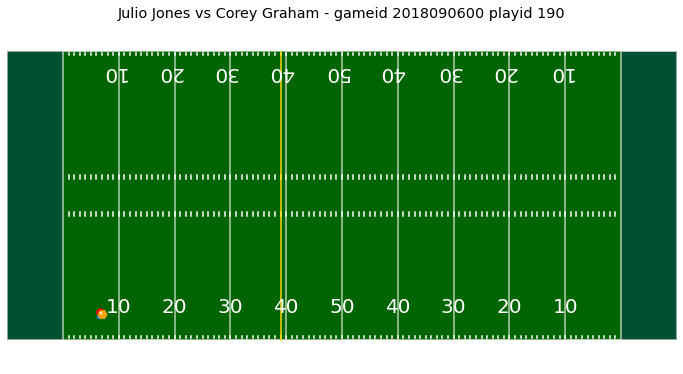

In [249]:
test = df_week1[(df_week1.gameid == 2018090600) & (df_week1.playid == 190)]
test = test[['frameid', 'absoluteyardlinenumber', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef']]
offense =  test[test.offdef == 'offense']
offense = offense[offense.displayname == 'Julio Jones']
defense = test[test.offdef == 'defense']
defense = defense[defense.displayname == 'Corey Graham']
football = test[test.offdef == 'football']

from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()

scat_offense = ax.scatter(offense[offense.frameid == 1].x, offense[offense.frameid == 1].y, color = 'dodgerblue', s = 90, marker = 'X')
scat_defense = ax.scatter(defense[defense.frameid == 1].x, defense[defense.frameid == 1].y, color = 'red', s = 60)
scat_football = ax.scatter(football[football.frameid == 1].x, football[football.frameid == 1].y, color = 'orange', s = 90, marker = 'H')

distance_line, = ax.plot([offense[offense.frameid == 1].x.values, defense[defense.frameid == 1].x.values], [offense[offense.frameid == 1].y.values, defense[defense.frameid == 1].y.values], color = 'white', animated=True)

plt.axvline(test.absoluteyardlinenumber.values[0], color = 'gold', ymax = 53.3/58, ymin = 5/63.3)
plt.title('Julio Jones vs Corey Graham - gameid 2018090600 playid 190')
def animate_basic(fr):
  scat_offense.set_offsets(np.c_[offense[offense.frameid == fr].x.values, offense[offense.frameid == fr].y.values])  
  scat_defense.set_offsets(np.c_[defense[defense.frameid == fr].x.values, defense[defense.frameid == fr].y.values])  
  scat_football.set_offsets(np.c_[football[football.frameid == fr].x.values, football[football.frameid == fr].y.values]) 
  x = [offense[offense.frameid == fr].x.values, defense[defense.frameid == fr].x.values]
  y = [offense[offense.frameid == fr].y.values, defense[defense.frameid == fr].y.values]
  distance_line.set_data(x, y)

HTML(animation.FuncAnimation(fig, animate_basic, frames=test.frameid.max(), interval = 100, repeat=True).to_html5_video())

## Top 10 Defenders by distanced gained on target receiver between pass forward and tackle

### Measures the closest defender at the time of tackle

Min 20 plays

In [155]:
x = df[df.def_position == 'CB'].groupby('displayname')[['closeout', 'closeout_speed']].agg(['count', 'mean'])
x.columns = ['_'.join(col) for col in x.columns]
x[x.closeout_count > 20].sort_values(by = 'closeout_mean', ascending = False)[['closeout_mean', 'closeout_speed_mean']].head(10).round(2)

,closeout_mean,closeout_speed_mean
displayname,,
Damarious Randall,11.31,3.04
Curtis Riley,10.88,3.65
Tramon Williams,9.13,2.54
Pierre Desir,9.09,2.79
Trumaine Johnson,8.91,2.88
Jalen Mills,8.28,2.52
Bobby McCain,8.17,2.62
Bryce Callahan,8.16,2.49
Justin Coleman,8.03,2.09


In [156]:
x[x.closeout_count > 20].sort_values(by = 'closeout_mean', ascending = False)[['closeout_mean', 'closeout_speed_mean']].tail(10).round(2)

,closeout_mean,closeout_speed_mean
displayname,,
Jaire Alexander,4.56,1.77
Janoris Jenkins,4.54,1.82
Chris Harris,4.52,1.65
Steven Nelson,4.49,1.45
Shaquill Griffin,4.48,1.62
Buster Skrine,4.20,2.00
K'Waun Williams,4.18,1.99
Orlando Scandrick,3.65,1.34
A.J. Bouye,3.59,1.38


In [157]:
x = df[df.def_position.isin(['FS', 'SS', 'S'])].groupby('displayname')[['closeout', 'closeout_speed']].agg(['count', 'mean'])
x.columns = ['_'.join(col) for col in x.columns]
x[x.closeout_count > 20].sort_values(by = 'closeout_mean', ascending = False)[['closeout_mean', 'closeout_speed_mean']].head(10).round(2)

,closeout_mean,closeout_speed_mean
displayname,,
Marcus Williams,16.28,4.78
Damontae Kazee,13.92,4.09
Jordan Poyer,13.64,4.09
Darian Stewart,13.63,4.72
Lamarcus Joyner,13.26,3.73
Tre Boston,13.04,3.98
Corey Graham,12.67,4.00
Sean Davis,12.46,4.33
Jessie Bates,12.31,3.97


In [158]:
x[x.closeout_count > 20].sort_values(by = 'closeout_mean', ascending = False)[['closeout_mean', 'closeout_speed_mean']].tail(10).round(2)

,closeout_mean,closeout_speed_mean
displayname,,
Jabrill Peppers,8.46,3.11
Tashaun Gipson,8.45,2.82
Devin McCourty,8.38,2.92
Marqui Christian,8.18,2.75
Glover Quin,8.08,3.00
Andrew Adams,8.05,2.63
Antoine Bethea,7.95,2.79
Patrick Chung,7.57,2.65
Landon Collins,7.01,2.52


##Top 10 Defenders by closeout speed

Min 20 plays



In [152]:
x = df.groupby('displayname')[['closeout', 'closeout_speed']].agg(['count', 'mean'])
x.columns = ['_'.join(col) for col in x.columns]
x[x.closeout_count > 20].sort_values(by = 'closeout_speed_mean', ascending = False)[['closeout_mean', 'closeout_speed_mean']].head(10).round(2)

,closeout_mean,closeout_speed_mean
displayname,,
Adrian Amos,1.84,1.87
Clayton Geathers,1.77,1.86
Devin McCourty,2.20,1.71
Sidney Jones,1.90,1.71
Johnathan Joseph,1.76,1.50
Nigel Bradham,1.51,1.50
Leighton Vander Esch,1.50,1.50
Darius Leonard,1.21,1.42
Duke Riley,0.80,1.39


## Average distanced gained on target receiver by defensive position

In [153]:
x = df.groupby('def_position').closeout.agg(['count', 'mean']).sort_values(by = 'mean', ascending = False)
x[x['count'] > 10].round(2)

,count,mean
def_position,,
S,143,0.86
DB,594,0.66
SS,1129,0.46
FS,1136,0.45
CB,7972,0.38
MLB,711,0.33
LB,982,0.21
ILB,1503,0.07
OLB,2209,-0.77


While this is by no means a definitive ranking for who the best defensive players are in the NFL, it's a start. Defense in the NFL is very much a dynamic and complex team effort. 

For example, this analysis assumes that the defender closest to the target receiver is the one responsible for covering him once the ball is in the air, which is not always the case. It could easily be the case that a player in a zone so happens to be closer to the target receiver than the assigned defender. 

The distance gained on a target receiver by a defender faces similar problems. Gaining lots of distance points to a quick and mobile defender who tracks the target receiver's movements well. However, a defender who frequently has much ground to gain on his target may also be finding themselves out of position too often. A player's defensive assignment will also have a significant impact on his distanced gained, since players in a zone will often be floating and covering an area as opposed to sticking to a target receiver.

That being said, this still offers a good starting point in terms of analyzing different NFL defensive players and how they perform on the field.





# BALL INFLUENCE

In [7]:
test = df_week1[(df_week1.gameid == 2018090600) & (df_week1.playid == 190)]
test = test[['frameid', 'absoluteyardlinenumber', 'yardstogo', 'playdirection', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef']]

offense =  test[test.offdef == 'offense']
defense = test[test.offdef == 'defense']
football = test[test.offdef == 'football']

In [8]:
def ball_influence_f(player_data, football_data):
  x = player_data.x.values[0]
  y = player_data.y.values[0]
  ballx = football_data.x.values[0]
  bally = football_data.y.values[0]
  s = player_data.s.values[0]
  theta = (player_data.dir.values[0]) * np.pi / 180
  sx = s * np.sin(theta)
  sy = s * np.cos(theta)
  sxy = [sx, sy]
  mu = np.array([x,y]) + np.array(sxy) * 0.5
  Rot = np.array([[np.sin(theta), -np.cos(theta)],[np.cos(theta),np.sin(theta)]])

  Srat = (s / 13) ** 2
  d = np.linalg.norm(np.array([x,y]) - np.array([ballx, bally]))
  #radius of ball influence is 10, unless d <= value
  if d <= 18:
    Ri = 4 + d**3/ (18**3/6)
  else:
    Ri = 10
  #Ri = np.minimum(4 + Ri**3/ (18**3/6),10) 
  S = np.array([[(1 + Srat) * Ri / 2, 0], [0, (1 - Srat) * Ri / 2]])
  Sigma = np.matmul(Rot,S)
  Sigma = np.matmul(Sigma,S)
  Sigma = np.matmul(Sigma,np.linalg.inv(Rot))
  from scipy.stats import multivariate_normal as mvn
  return (mvn.pdf(np.c_[xx.flatten(), yy.flatten()], mu, Sigma) / mvn.pdf([x, y], mu, Sigma)).reshape(55,121)


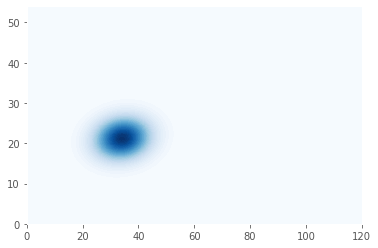

In [9]:
xx,yy = np.meshgrid(np.linspace(0,120,121),np.linspace(0,54,55))

plt.contourf(xx, yy, ball_influence_f(offense[(offense.displayname == 'Julio Jones')& (offense.frameid == 36)], football[football.frameid == 36]), cmap = 'Blues', levels = 50)

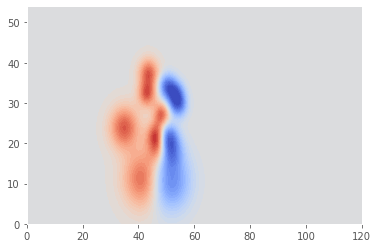

In [71]:
c_offense = np.zeros(121*55).reshape(55,121)
c_defense = np.zeros(121*55).reshape(55,121)
xx,yy = np.meshgrid(np.linspace(0,120,121),np.linspace(0,54,55))

for player in offense.displayname.value_counts().index:
  c_offense += ball_influence_f(offense[offense.displayname == player], football)

for player in defense.displayname.value_counts().index:
  c_defense += ball_influence_f(defense[defense.displayname == player], football)

z = 1 / (1 + np.exp(-c_offense + c_defense))
plt.contourf(xx, yy, z, cmap = 'coolwarm_r', levels = 50, vmin = 0.2, vmax = 0.8)
plt.show()

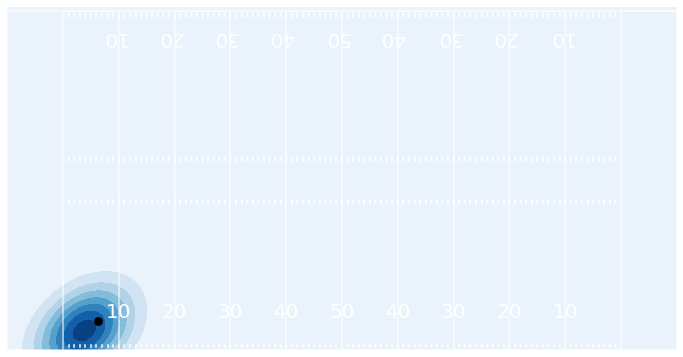

In [36]:
test_player_offense = offense[(offense.displayname == 'Julio Jones')]

from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()

def animate_player(fr):
  fr = fr+1
  plt.contourf(xx, yy, ball_influence_f(test_player_offense[test_player_offense.frameid == fr], football), cmap = 'Blues')
  plt.scatter(test_player_offense[test_player_offense.frameid == fr].x, test_player_offense[test_player_offense.frameid == fr].y, marker = 'o', s = 70, c = 'black')

HTML(animation.FuncAnimation(fig, animate_player, frames=test_player_offense.frameid.max(), interval = 100,repeat=True).to_html5_video())

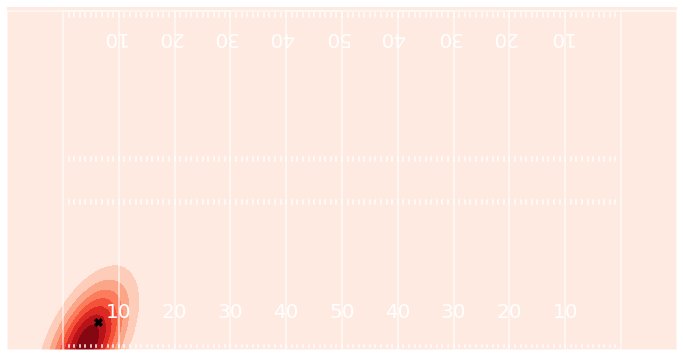

In [37]:
test_player_defense = defense[(defense.displayname == 'Corey Graham')]

from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()

def animate_player(fr):
  fr = fr+1
  plt.contourf(xx, yy, ball_influence_f(test_player_defense[test_player_defense.frameid == fr], football), cmap = 'Reds')
  plt.scatter(test_player_defense[test_player_defense.frameid == fr].x, test_player_defense[test_player_defense.frameid == fr].y, marker = 'X', s = 70, c = 'black')

HTML(animation.FuncAnimation(fig, animate_player, frames=test_player_defense.frameid.max(), interval = 100,repeat=True).to_html5_video())

In [159]:
test = df_week1[(df_week1.gameid == 2018090600) & (df_week1.playid == 190)]
test = test[['frameid', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef', 'absoluteyardlinenumber', 'yardstogo', 'playdirection']]
offense = test[test.offdef == 'offense']
defense = test[test.offdef == 'defense']
football = test[test.offdef == 'football']

In [10]:
xx,yy = np.meshgrid(np.linspace(0,120,121),np.linspace(0,54,55))

def animate(fr, loc = 'lower right'):
  fr = fr + 1
  c_offense = np.zeros(121*55).reshape(55,121)
  c_defense = np.zeros(121*55).reshape(55,121)

  for player in offense.displayname.value_counts().index:
    c_offense += ball_influence_f(offense[(offense.displayname == player) & (offense.frameid == fr)], football)

  for player in defense.displayname.value_counts().index:
    c_defense += ball_influence_f(defense[(defense.displayname == player) & (defense.frameid == fr)], football)
  #z = c_offense - c_defense
  z = 1 / (1 + np.exp(-c_offense + c_defense))
 
  plt.contourf(xx, yy, z, levels = 50, vmin = 0.2, vmax = 0.8, cmap = 'coolwarm_r', alpha = 0.7)

  plt.scatter(offense[offense.frameid == fr].x, offense[offense.frameid == fr].y, c = 'black', s = 90, marker = 'X', alpha = 1)
  plt.scatter(defense[defense.frameid == fr].x, defense[defense.frameid == fr].y, c = 'black', s = 70, marker = 'o', alpha = 1)
  plt.scatter(football[football.frameid == fr].x, football[football.frameid == fr].y, c = 'orange', s = 90, marker = 'H')
  plt.axvline(test.absoluteyardlinenumber.values[0], c = 'dodgerblue', alpha = 0.5)
  if test.playdirection.values[0] == 'left':
    first = test.absoluteyardlinenumber.values[0] - test.yardstogo.values[0]
  else:
    first = test.yardstogo.values[0] - test.absoluteyardlinenumber.values[0]
  plt.axvline(first, c = 'gold', ymin = 0, ymax = 53.3, alpha = 0.7)
  legend_elements = [Line2D([0], [0], marker='o', color='black', label='Defense',
                          markerfacecolor='black', markersize=6, ls = ''),
                     Line2D([0], [0], marker='x', color='black', label='Offense',
                          markerfacecolor='black', markersize=6, ls = '')]
  plt.legend(handles=legend_elements, loc=loc)



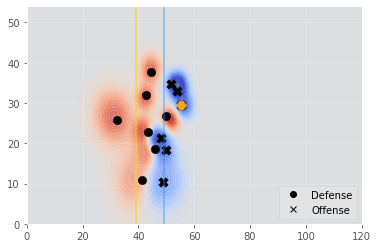

In [161]:
animate(20)

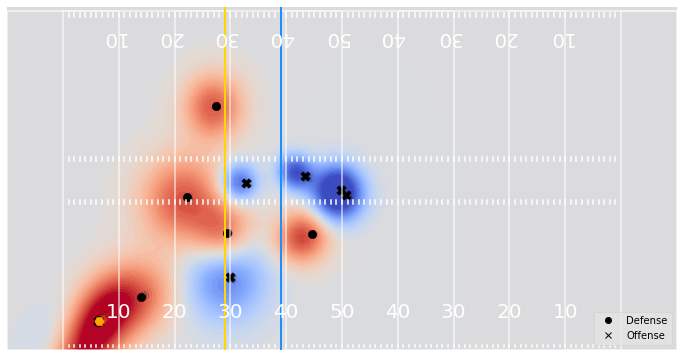

In [162]:
from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()
HTML(animation.FuncAnimation(fig, animate, frames=test.frameid.max(), interval = 100,repeat=True).to_html5_video())

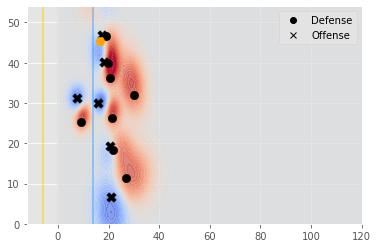

In [81]:
animate(36)

# MODEL

In [14]:
ball_arrived = ['pass_arrived', 'pass_outcome_caught', 'pass_outcome_incomplete', 'pass_outcome_interception', 'pass_tipped', 'pass_outcome_touchdown', 'pass_shovel']

In [15]:
def x_mod_function(row):
  if row.playdirection == 'left':
    result = row.absoluteyardlinenumber - row.x

  elif row.playdirection == 'right':
    result = row.x - row.absoluteyardlinenumber

  return result



In [165]:
import os
filenames = os.listdir('/content/gdrive/My Drive/NFL/NFLbowl-2021/data')
weekly_filenames = ['week1.csv','week2.csv','week3.csv','week4.csv','week5.csv','week6.csv','week7.csv','week8.csv','week9.csv','week10.csv','week11.csv',
                    'week12.csv','week13.csv','week14.csv','week15.csv','week16.csv','week17.csv']

df_list = []
for file in weekly_filenames:

  temp = pd.read_csv('/content/gdrive/My Drive/NFL/NFLbowl-2021/data/week_data/' + file)
  temp.columns = [x.lower() for x in temp.columns]
  temp = temp[temp.event.isin(ball_arrived)]

  football = temp[temp.displayname == 'Football'].groupby(['gameid', 'playid'])[['x', 'y', 'playdirection']].agg({'x':'mean', 'y':'mean', 'playdirection':'max'}).reset_index()

  data = pd.merge(df_plays[['gameid', 'playid', 'passresult', 'absoluteyardlinenumber']], football, how = 'inner', on = ['gameid', 'playid'])

  data['xmod'] = data.apply(x_mod_function, axis = 1)

  df_list.append(data)

In [166]:
df = pd.concat(df_list)

In [167]:
df.head()

,gameid,playid,passresult,absoluteyardlinenumber,x,y,playdirection,xmod
0,2018090600,75,C,90.0,82.405,48.675,left,7.595
1,2018090600,146,I,49.0,44.655,36.330,left,4.345
2,2018090600,168,I,49.0,51.590,5.810,left,-2.590
3,2018090600,190,C,49.0,24.830,10.280,left,24.170
4,2018090600,256,I,11.0,9.525,43.740,left,1.475


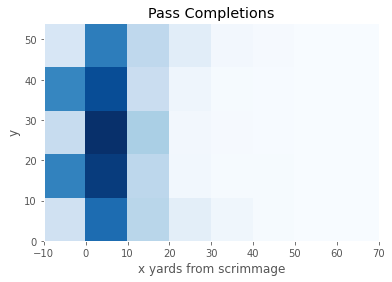

In [170]:
plt.hist2d(df[df.passresult == 'C'].xmod, df[df.passresult == 'C'].y, bins = (8,5), range = [[-10, 70], [0, 54]], cmap = 'Blues')
plt.title('Pass Completions')
plt.xlabel('x yards from scrimmage')
plt.ylabel('y')
plt.show()


In [22]:
df_targets = pd.merge(df_targets, df_players[['nflid', 'position', 'displayname']], how = 'left', left_on = 'targetnflid', right_on = 'nflid')

In [23]:
df_targets.head()

,gameid,playid,targetnflid,nflid,position,displayname
0,2018090600,75,2495454.0,2495454.0,WR,Julio Jones
1,2018090600,146,2560854.0,2560854.0,WR,Calvin Ridley
2,2018090600,168,2543583.0,2543583.0,RB,Devonta Freeman
3,2018090600,190,2495454.0,2495454.0,WR,Julio Jones
4,2018090600,256,2543583.0,2543583.0,RB,Devonta Freeman


In [16]:
temp = df_week1[df_week1.event.isin(ball_arrived)]

football = temp[temp.displayname == 'Football'].groupby(['gameid', 'playid'])[['frameid', 'x', 'y', 'playdirection', 'numberofpassrushers']].agg({'frameid':'min', 'x':'mean', 'y':'mean', 'playdirection':'max', 'numberofpassrushers':'max'}).reset_index()

data = pd.merge(df_plays[['gameid', 'playid', 'passresult', 'absoluteyardlinenumber']], football, how = 'inner', on = ['gameid', 'playid'])

data['xmod'] = data.apply(x_mod_function, axis = 1)



In [17]:
data.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475


In [18]:
def dataframe_z_function(row):  
  data = df_week1[(df_week1.gameid == row.gameid) & (df_week1.playid == row.playid) & (df_week1.event == 'pass_forward')]
  o = data[data.offdef == 'offense']
  d = data[data.offdef == 'defense']
  f = data[data.offdef == 'football']

  c_offense = np.zeros(121*55).reshape(55,121)
  c_defense = np.zeros(121*55).reshape(55,121)
  xx,yy = np.meshgrid(np.linspace(0,120,121),np.linspace(0,54,55))

  for player in o.displayname.value_counts().index:
    c_offense += ball_influence_f(o[(o.displayname == player)], f)

  for player in d.displayname.value_counts().index:
    c_defense += ball_influence_f(d[d.displayname == player], f)

  z = 1 / (1 + np.exp(-c_offense + c_defense))

  x = int(row.x)
  y = int(row.y)

  if y > 54:
    y = 54
  if y < 0:
    y = 0

  if x > 120:
    x = 120
  if x < 0:
    x = 0
  return z[y,x]  

In [19]:
z = data.apply(dataframe_z_function, axis = 1)

In [20]:
data['z'] = z
data.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539


In [24]:
data = pd.merge(data, df_targets[['gameid', 'playid', 'position', 'displayname']], how = 'left', on = ['gameid', 'playid'])

In [25]:
data = pd.merge(data, df_week1[['gameid', 'playid', 'frameid', 'displayname', 's']], how = 'left', on = ['gameid', 'playid', 'frameid', 'displayname'])

In [26]:
data.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663,WR,Julio Jones,4.23
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994,WR,Calvin Ridley,0.16
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112,RB,Devonta Freeman,2.42
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518,WR,Julio Jones,7.88
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539,RB,Devonta Freeman,6.39


In [27]:
#make the pass result 1 if C, 0 if I or INT
data['result'] = data.passresult.apply(lambda x: 1 if x == 'C' else 0)
data.dropna(inplace=True)
data.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663,WR,Julio Jones,4.23,1
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994,WR,Calvin Ridley,0.16,0
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112,RB,Devonta Freeman,2.42,0
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518,WR,Julio Jones,7.88,1
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539,RB,Devonta Freeman,6.39,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = data[['xmod', 'y', 'z']]
y = data['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

model = RandomForestClassifier(random_state = 19)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
df_results = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7640449438202247

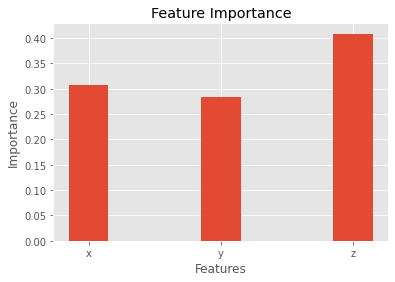

In [38]:
plt.bar(['x', 'y', 'z'], model.feature_importances_, width = 0.3)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

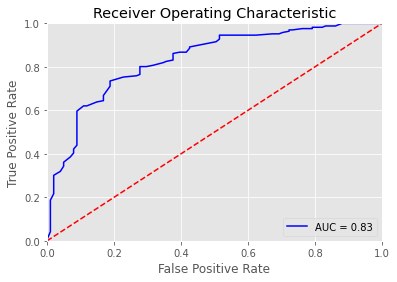

In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

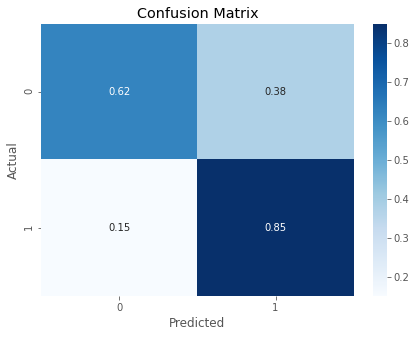

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#create confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalise
cm_normal = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#plot confusion matrix
plt.figure(figsize = (7,5))
sns.heatmap(cm_normal, cmap = 'Blues', annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [50]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.817391304347826

In [51]:
data['predict'] = model.predict_proba(X)[:,1]

In [35]:
data.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,predict
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663,WR,Julio Jones,4.23,1,0.94
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994,WR,Calvin Ridley,0.16,0,0.13
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112,RB,Devonta Freeman,2.42,0,0.10
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518,WR,Julio Jones,7.88,1,0.45
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539,RB,Devonta Freeman,6.39,0,0.46


### True Positive

In [63]:
data.sort_values(by = 'predict', ascending = False).head(10)

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,predict
626,2018090909,2618,C,56.0,38,59.755,33.620,right,4.0,3.755,0.720670,WR,Paul Richardson,1.15,1,1.0
864,2018091001,915,C,55.0,50,51.930,14.035,right,4.0,-3.070,0.673643,RB,Marshawn Lynch,5.36,1,1.0
421,2018090905,2710,C,64.0,30,66.060,45.030,right,2.0,2.060,0.632909,WR,Phillip Dorsett,2.74,1,1.0
39,2018090600,2382,C,68.0,32,68.755,41.650,left,5.0,-0.755,0.803497,WR,Nelson Agholor,6.38,1,1.0
315,2018090900,622,C,95.0,34,99.895,14.465,left,4.0,-4.895,0.711586,WR,Jeremy Kerley,6.44,1,1.0
729,2018090912,1493,C,31.0,35,27.620,13.305,right,4.0,-3.380,0.745873,WR,Taylor Gabriel,5.44,1,1.0
801,2018091000,1362,C,74.0,53,73.040,43.415,right,5.0,-0.960,0.841744,WR,Quincy Enunwa,6.94,1,1.0
464,2018090907,1268,C,95.0,35,99.305,16.860,left,4.0,-4.305,0.734148,RB,Wayne Gallman,1.48,1,1.0
492,2018090907,2853,C,64.0,45,68.125,37.795,left,4.0,-4.125,0.731597,RB,T.J. Yeldon,3.59,1,1.0
817,2018091000,2201,C,86.0,36,91.285,27.145,right,7.0,5.285,0.719745,WR,Golden Tate,6.12,1,1.0


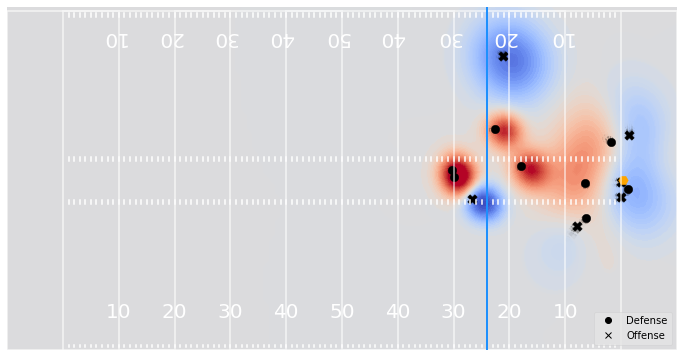

In [64]:
# target = Golden Tate

test = df_week1[(df_week1.gameid == 2018091000) & (df_week1.playid == 2201)]
test = test[['frameid', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef', 'absoluteyardlinenumber', 'yardstogo', 'playdirection']]
offense = test[test.offdef == 'offense']
defense = test[test.offdef == 'defense']
football = test[test.offdef == 'football']


from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()
HTML(animation.FuncAnimation(fig, animate, frames=test.frameid.max(), interval = 100,repeat=True).to_html5_video())

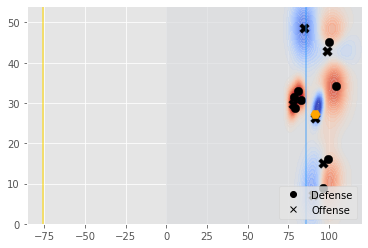

In [65]:
animate(36)

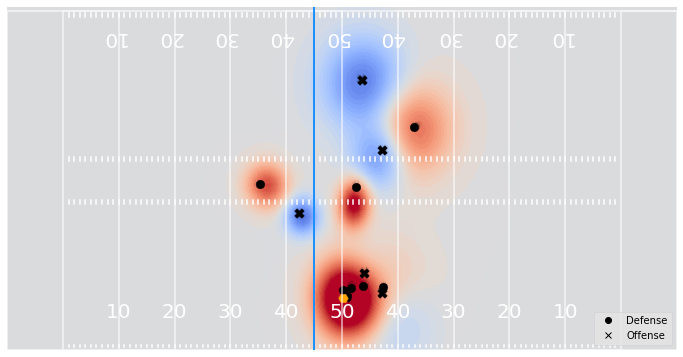

In [66]:
#target = Marshawn Lynch

test = df_week1[(df_week1.gameid == 2018091001) & (df_week1.playid == 915)]
test = test[['frameid', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef', 'absoluteyardlinenumber', 'yardstogo', 'playdirection']]
offense = test[test.offdef == 'offense']
defense = test[test.offdef == 'defense']
football = test[test.offdef == 'football']


from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()
HTML(animation.FuncAnimation(fig, animate, frames=test.frameid.max(), interval = 100,repeat=True).to_html5_video())

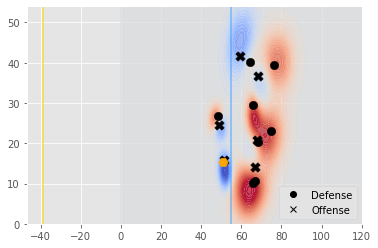

In [67]:
animate(50)

### True Negative

In [68]:
data.sort_values(by = 'predict', ascending = True).head(10)

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,predict
224,2018090902,3812,I,31.0,59,10.230,-0.280,left,5.0,20.770,0.498549,WR,A.J. Green,8.60,0,0.00
902,2018091001,3223,I,51.0,64,73.810,36.460,right,4.0,22.810,0.462142,WR,Robert Woods,7.00,0,0.01
772,2018090912,3704,I,91.0,54,66.360,56.380,left,4.0,24.640,0.501699,WR,Allen Robinson,8.18,0,0.01
25,2018090600,1628,I,105.0,40,112.610,41.380,left,4.0,-7.610,0.437578,RB,Darren Sproles,4.29,0,0.02
652,2018090909,4050,I,65.0,51,84.730,-4.180,right,4.0,19.730,0.466294,WR,Chad Williams,0.43,0,0.02
793,2018091000,1029,I,55.0,93,2.865,54.595,left,4.0,52.135,0.501185,WR,Marvin Jones,6.08,0,0.02
336,2018090900,1869,IN,28.0,64,53.665,24.080,right,4.0,25.665,0.311951,WR,Kelvin Benjamin,5.50,0,0.02
776,2018090912,3827,I,64.0,62,38.210,54.750,left,3.0,25.790,0.499869,WR,Allen Robinson,7.24,0,0.02
111,2018090901,2570,I,89.0,63,56.120,50.650,left,4.0,32.880,0.500480,WR,Jarvis Landry,8.66,0,0.02
484,2018090907,2511,I,53.0,43,54.490,23.650,left,4.0,-1.490,0.467445,RB,T.J. Yeldon,1.64,0,0.02


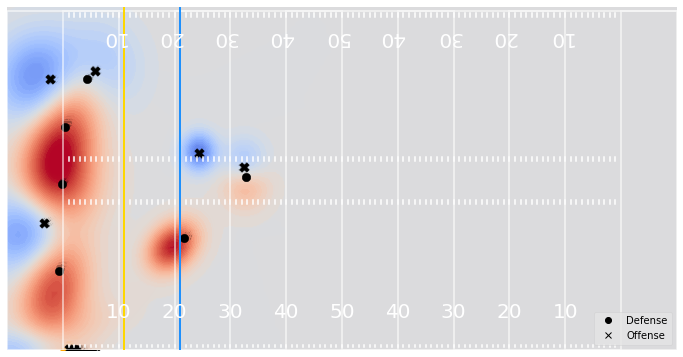

In [69]:
# target = AJ Green

test = df_week1[(df_week1.gameid == 2018090902) & (df_week1.playid == 3812)]
test = test[['frameid', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef', 'absoluteyardlinenumber', 'yardstogo', 'playdirection']]
offense = test[test.offdef == 'offense']
defense = test[test.offdef == 'defense']
football = test[test.offdef == 'football']


from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()
HTML(animation.FuncAnimation(fig, animate, frames=test.frameid.max(), interval = 100,repeat=True).to_html5_video())

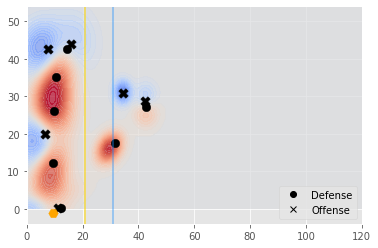

In [70]:
animate(59)

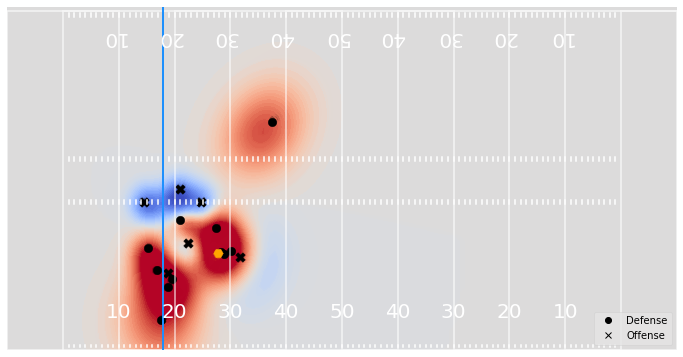

In [71]:
#target = Kelvin Benjamin

test = df_week1[(df_week1.gameid == 2018090900) & (df_week1.playid == 1869)]
test = test[['frameid', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef', 'absoluteyardlinenumber', 'yardstogo', 'playdirection']]
offense = test[test.offdef == 'offense']
defense = test[test.offdef == 'defense']
football = test[test.offdef == 'football']


from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()
HTML(animation.FuncAnimation(fig, animate, frames=test.frameid.max(), interval = 100,repeat=True).to_html5_video())

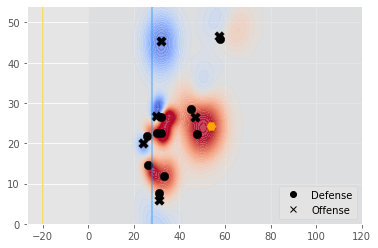

In [72]:
animate(64)

### False Positives

In [74]:
data[data.result == 0].sort_values(by = 'predict', ascending = False).head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,predict
107,2018090901,1912,IN,47.0,31,42.380,35.720,left,4.0,4.620,0.754413,TE,Jesse James,4.10,0,0.99
789,2018091000,716,I,35.0,40,38.660,40.770,right,3.0,3.660,0.572046,RB,Theo Riddick,3.30,0,0.94
361,2018090900,3680,I,92.0,37,92.345,45.630,left,4.0,-0.345,0.635095,RB,Marcus Murphy,5.28,0,0.90
52,2018090600,3066,I,90.0,47,87.025,33.775,left,4.0,2.975,0.578863,TE,Zach Ertz,0.73,0,0.90
475,2018090907,2021,I,48.0,64,50.490,48.140,right,4.0,2.490,0.579599,RB,Saquon Barkley,5.53,0,0.89


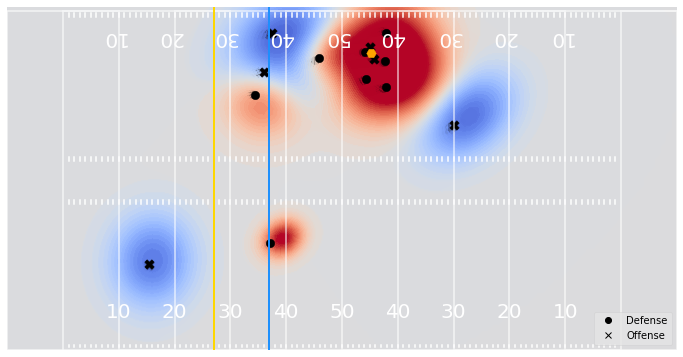

In [75]:
#target = Jesse James

test = df_week1[(df_week1.gameid == 2018090901) & (df_week1.playid == 1912)]
test = test[['frameid', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef', 'absoluteyardlinenumber', 'yardstogo', 'playdirection']]
offense = test[test.offdef == 'offense']
defense = test[test.offdef == 'defense']
football = test[test.offdef == 'football']


from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()
HTML(animation.FuncAnimation(fig, animate, frames=test.frameid.max(), interval = 100,repeat=True).to_html5_video())

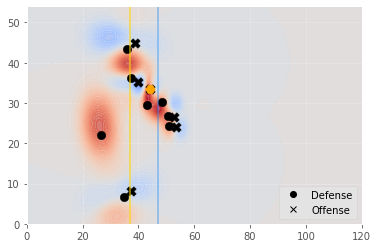

In [76]:
animate(31)

https://www.youtube.com/watch?v=vWDyxb1HLn4

The model predicted this as an easy catch, and from the highlight reel we can see what should have been a catch (ball bounces off his literal fingertips) turn into an interception. 

### False Negative

In [77]:
data[data.result == 1].sort_values(by = 'predict', ascending = True).head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,predict
71,2018090600,4258,C,50.0,56,31.71,3.465,left,4.0,18.29,0.470337,WR,Julio Jones,2.17,1,0.09
586,2018090906,4173,C,47.0,50,28.46,22.320,left,4.0,18.54,0.458701,WR,Michael Thomas,6.67,1,0.09
374,2018090905,228,C,89.0,47,108.77,52.735,right,4.0,19.77,0.389509,TE,Rob Gronkowski,4.70,1,0.16
346,2018090900,2377,C,22.0,55,0.25,2.080,left,4.0,21.75,0.513687,WR,Michael Crabtree,6.45,1,0.19
600,2018090909,851,C,85.0,39,88.33,26.215,left,4.0,-3.33,0.440502,WR,Larry Fitzgerald,6.70,1,0.21


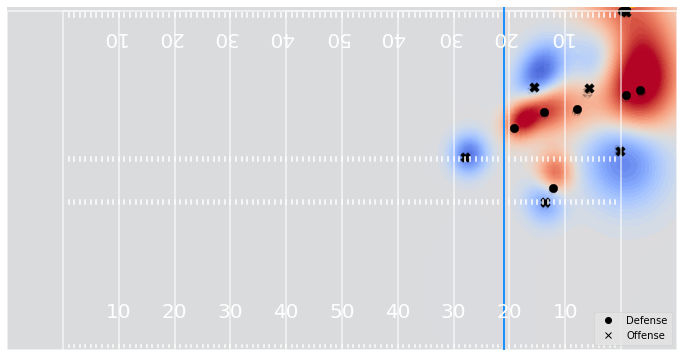

In [78]:
#target = Rob Gronkowski

test = df_week1[(df_week1.gameid == 2018090905) & (df_week1.playid == 228)]
test = test[['frameid', 'x', 'y', 's', 'a', 'dir', 'o', 'displayname', 'offdef', 'absoluteyardlinenumber', 'yardstogo', 'playdirection']]
offense = test[test.offdef == 'offense']
defense = test[test.offdef == 'defense']
football = test[test.offdef == 'football']


from IPython.display import HTML
import matplotlib.animation as animation

fig,ax = create_football_field()
HTML(animation.FuncAnimation(fig, animate, frames=test.frameid.max(), interval = 100,repeat=True).to_html5_video())

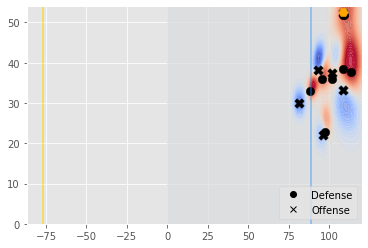

In [79]:
animate(47)

https://www.youtube.com/watch?v=EdU_hsrYusY

In the very first play of this highlight reel, we can see just how amazing of a catch Gronk makes as he's smothered by two defenders. The model predicts this as a complete pass only 16% of the time, which looks like it makes sense given how well Gronk looks like he's being defended.

---



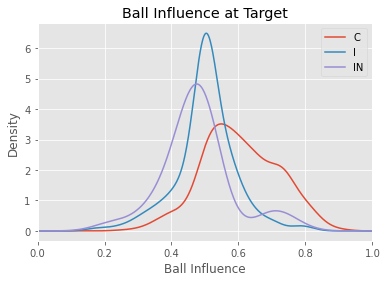

In [73]:
data[data.passresult != 'S'].groupby('passresult').z.plot.kde(legend = True, xlim = [0,1], title = 'Ball Influence at Target')
plt.xlabel('Ball Influence')
plt.show()

In [80]:
data.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,predict
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663,WR,Julio Jones,4.23,1,0.94
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994,WR,Calvin Ridley,0.16,0,0.13
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112,RB,Devonta Freeman,2.42,0,0.10
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518,WR,Julio Jones,7.88,1,0.45
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539,RB,Devonta Freeman,6.39,0,0.46


In [81]:
df_games.head()

,gameid,gamedate,gametimeeastern,hometeamabbr,visitorteamabbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [82]:
df_plays.head()

,gameid,playid,playdescription,quarter,down,yardstogo,possessionteam,playtype,yardlineside,yardlinenumber,offenseformation,personnelo,defendersinthebox,numberofpassrushers,personneld,typedropback,presnapvisitorscore,presnaphomescore,gameclock,absoluteyardlinenumber,penaltycodes,penaltyjerseynumbers,passresult,offenseplayresult,playresult,epa,isdefensivepi
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [39]:
teams_defense = pd.merge(df_plays[['gameid', 'playid', 'possessionteam']], df_games, how = 'left', on = 'gameid')

In [40]:
teams_defense['defense'] = teams_defense.apply(lambda x: x.hometeamabbr if x.hometeamabbr != x.possessionteam else x.visitorteamabbr, axis = 1)

In [41]:
data = pd.merge(data, teams_defense[['gameid', 'playid', 'defense']], how = 'left', on = ['gameid', 'playid'])

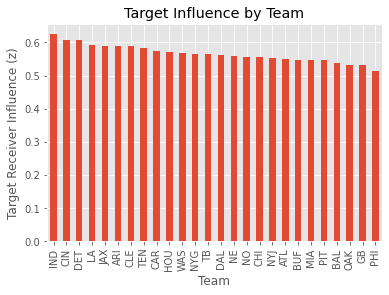

In [102]:
data.groupby('defense').z.mean().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Team')
plt.ylabel('Target Receiver Influence (z)')
plt.title('Target Influence by Team')
plt.show()

In [110]:
data.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,predict,defense
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663,WR,Julio Jones,4.23,1,0.94,PHI
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994,WR,Calvin Ridley,0.16,0,0.13,PHI
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112,RB,Devonta Freeman,2.42,0,0.10,PHI
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518,WR,Julio Jones,7.88,1,0.45,PHI
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539,RB,Devonta Freeman,6.39,0,0.46,PHI


In [44]:
data = pd.merge(data, df_covers, how = 'left', on = ['gameid', 'playid'])

In [45]:
data.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,defense,coverage
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663,WR,Julio Jones,4.23,1,PHI,Cover 3 Zone
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994,WR,Calvin Ridley,0.16,0,PHI,Cover 3 Zone
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112,RB,Devonta Freeman,2.42,0,PHI,Cover 3 Zone
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518,WR,Julio Jones,7.88,1,PHI,Cover 3 Zone
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539,RB,Devonta Freeman,6.39,0,PHI,Cover 0 Man


In [46]:
data.groupby('coverage').z.mean()

coverage
Cover 0 Man     0.553159
Cover 1 Man     0.551703
Cover 2 Man     0.525589
Cover 2 Zone    0.580638
Cover 3 Zone    0.563503
Cover 4 Zone    0.586387
Cover 6 Zone    0.571169
Prevent Zone    0.535765
Name: z, dtype: float64

coverage
Cover 1 Man     AxesSubplot(0.125,0.125;0.775x0.755)
Cover 3 Zone    AxesSubplot(0.125,0.125;0.775x0.755)
Cover 4 Zone    AxesSubplot(0.125,0.125;0.775x0.755)
Name: z, dtype: object

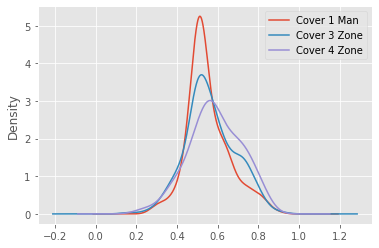

In [114]:
data[data.coverage.isin(['Cover 3 Zone', 'Cover 1 Man', 'Cover 4 Zone'])].groupby('coverage').z.plot.kde(legend = True)

In [112]:
df_routes = df_week1.groupby(['gameid', 'playid', 'displayname']).route.max().reset_index()
df_routes = pd.merge(df_routes, df_targets[['gameid', 'playid', 'position', 'displayname']], how = 'right', on = ['gameid', 'playid', 'displayname'])

In [113]:
df_routes.head()

,gameid,playid,displayname,route,position
0,2018090600,75,Julio Jones,HITCH,WR
1,2018090600,146,Calvin Ridley,HITCH,WR
2,2018090600,168,Devonta Freeman,SCREEN,RB
3,2018090600,190,Julio Jones,CORNER,WR
4,2018090600,256,Devonta Freeman,OUT,RB


In [114]:
data.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,defense,coverage,predict
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663,WR,Julio Jones,4.23,1,PHI,Cover 3 Zone,0.94
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994,WR,Calvin Ridley,0.16,0,PHI,Cover 3 Zone,0.13
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112,RB,Devonta Freeman,2.42,0,PHI,Cover 3 Zone,0.10
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518,WR,Julio Jones,7.88,1,PHI,Cover 3 Zone,0.45
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539,RB,Devonta Freeman,6.39,0,PHI,Cover 0 Man,0.46


In [115]:
data = pd.merge(data, df_routes[['gameid', 'playid', 'route']], how = 'left', on = ['gameid', 'playid'])

In [116]:
data.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,defense,coverage,predict,route
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663,WR,Julio Jones,4.23,1,PHI,Cover 3 Zone,0.94,HITCH
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994,WR,Calvin Ridley,0.16,0,PHI,Cover 3 Zone,0.13,HITCH
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112,RB,Devonta Freeman,2.42,0,PHI,Cover 3 Zone,0.10,SCREEN
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518,WR,Julio Jones,7.88,1,PHI,Cover 3 Zone,0.45,CORNER
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539,RB,Devonta Freeman,6.39,0,PHI,Cover 0 Man,0.46,OUT


In [117]:
z_covers_routes = data.groupby(['coverage', 'route']).z.mean().unstack().round(2)

In [146]:
data.groupby('route').coverage.count()

route
ANGLE      41
CORNER     22
CROSS      98
FLAT      113
GO        109
HITCH     125
IN         55
OUT       136
POST       42
SCREEN     77
SLANT      58
WHEEL       6
Name: coverage, dtype: int64

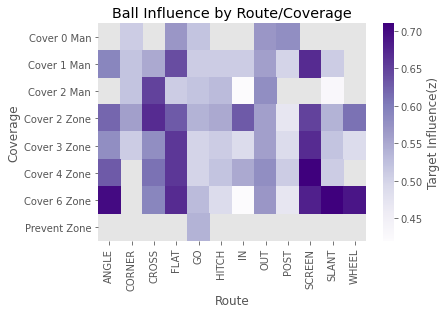

In [126]:
sns.heatmap(z_covers_routes, cmap = 'Purples', cbar = True, cbar_kws = {'label':'Target Influence(z)'})
plt.title('Ball Influence by Route/Coverage')
plt.xlabel('Route')
plt.ylabel('Coverage')
plt.show()

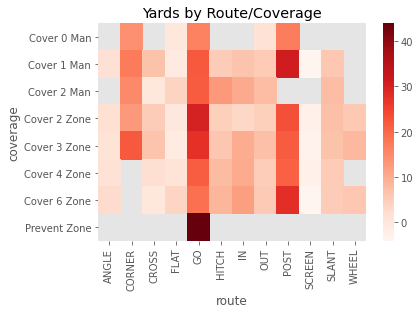

In [156]:
yards_covers_routes = data.groupby(['coverage', 'route']).xmod.mean().unstack().round(2)

sns.heatmap(yards_covers_routes, cmap = 'Reds')
plt.title('Yards by Route/Coverage')
plt.show()

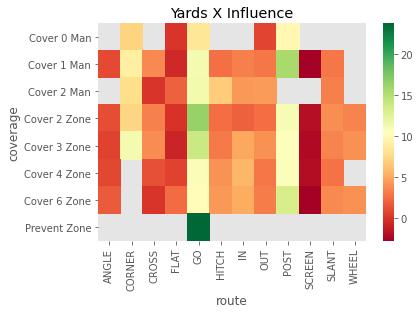

In [160]:
sns.heatmap(yards_covers_routes * z_covers_routes, cmap = 'RdYlGn')
plt.title('Yards X Influence')
plt.show()

In [324]:
data.groupby('route')[['z', 'xmod', 'result']].mean().round(2).sort_values(by = 'z', ascending = False)

,z,xmod,result
route,,,
SCREEN,0.67,-3.37,0.78
FLAT,0.65,-0.17,0.75
ANGLE,0.61,1.57,0.71
WHEEL,0.61,6.65,0.67
CROSS,0.58,5.37,0.70
OUT,0.57,6.04,0.66
CORNER,0.52,18.33,0.41
HITCH,0.52,6.30,0.65
SLANT,0.52,6.33,0.72


In [75]:
test = pd.merge(df_week1, df_covers, how = 'left', on = ['gameid', 'playid'])

In [76]:
df_week1['dirmod'] = df_week1.apply(lambda x: -x.dir if x.playdirection == 'left' else x.dir, axis = 1)

In [79]:
def ball_influence_xmod_f(player_data, football_data):
  x = player_data.xmod.values[0] + 50
  y = player_data.y.values[0]
  ballx = football_data.xmod.values[0] + 50
  bally = football_data.y.values[0]
  s = player_data.s.values[0]
  theta = (player_data.dirmod.values[0]) * np.pi / 180
  sx = s * np.sin(theta)
  sy = s * np.cos(theta)
  sxy = [sx, sy]
  mu = np.array([x,y]) + np.array(sxy) * 0.5
  Rot = np.array([[np.sin(theta), -np.cos(theta)],[np.cos(theta),np.sin(theta)]])

  Srat = (s / 13) ** 2
  d = np.linalg.norm(np.array([x,y]) - np.array([ballx, bally]))
  #radius of ball influence is 10, unless d <= value
  if d <= 18:
    Ri = 4 + d**3/ (18**3/6)
  else:
    Ri = 10
  #Ri = np.minimum(4 + Ri**3/ (18**3/6),10) 
  S = np.array([[(1 + Srat) * Ri / 2, 0], [0, (1 - Srat) * Ri / 2]])
  Sigma = np.matmul(Rot,S)
  Sigma = np.matmul(Sigma,S)
  Sigma = np.matmul(Sigma,np.linalg.inv(Rot))
  from scipy.stats import multivariate_normal as mvn
  return (mvn.pdf(np.c_[xx.flatten(), yy.flatten()], mu, Sigma) / mvn.pdf([x, y], mu, Sigma)).reshape(55,121)

In [80]:
def z_function(row):  
  data = df_week1[(df_week1.gameid == row.gameid) & (df_week1.playid == row.playid) & (df_week1.event.isin(ball_arrived))]
  o = data[data.offdef == 'offense']
  d = data[data.offdef == 'defense']
  f = data[data.offdef == 'football']

  c_offense = np.zeros(121*55).reshape(55,121)
  c_defense = np.zeros(121*55).reshape(55,121)
  xx,yy = np.meshgrid(np.linspace(0,120,121),np.linspace(0,54,55))

  for player in o.displayname.value_counts().index:
    c_offense += ball_influence_xmod_f(o[(o.displayname == player)], f)

  for player in d.displayname.value_counts().index:
    c_defense += ball_influence_xmod_f(d[d.displayname == player], f)

  z = 1 / (1 + np.exp(-c_offense + c_defense))

  return np.array(z, dtype = 'float')

In [129]:
z_total = np.zeros(121*55).reshape(55,121)

test = df_covers.copy()

test['z'] = test.apply(z_function, axis = 1)

In [130]:
test['z'] = test.z.apply(lambda x: np.nan if np.isnan(np.sum(x)) else x)
test.dropna(inplace=True)

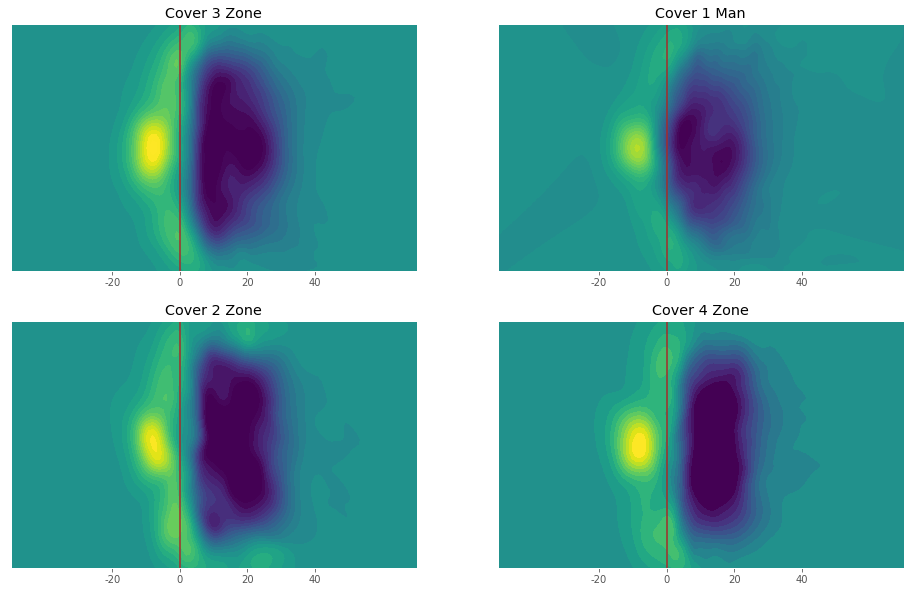

In [145]:
plt.figure(figsize = (16,10))

plt.subplot(2,2,1)
plt.contourf(xx, yy, test[test.coverage == 'Cover 3 Zone'].z.sum() / len(test[test.coverage == 'Cover 3 Zone']), levels = 30, vmin = 0.42, vmax = 0.58)
plt.axvline(50, c = 'Brown')
plt.title('Cover 3 Zone')
plt.xticks([30, 50, 70, 90], [-20, 0, 20, 40])
plt.yticks([])

plt.subplot(2,2,2)
plt.contourf(xx, yy, test[test.coverage == 'Cover 1 Man'].z.sum() / len(test[test.coverage == 'Cover 1 Man']), levels = 30, vmin = 0.42, vmax = 0.58)
plt.axvline(50, c = 'Brown')
plt.title('Cover 1 Man')
plt.xticks([30, 50, 70, 90], [-20, 0, 20, 40])
plt.yticks([])

plt.subplot(2,2,3)
plt.contourf(xx, yy, test[test.coverage == 'Cover 2 Zone'].z.sum() / len(test[test.coverage == 'Cover 2 Zone']), levels = 30, vmin = 0.42, vmax = 0.58)
plt.axvline(50, c = 'Brown')
plt.title('Cover 2 Zone')
plt.xticks([30, 50, 70, 90], [-20, 0, 20, 40])
plt.yticks([])

plt.subplot(2,2,4)
plt.contourf(xx, yy, test[test.coverage == 'Cover 4 Zone'].z.sum() / len(test[test.coverage == 'Cover 4 Zone']), levels = 30, vmin = 0.42, vmax = 0.58)
plt.axvline(50, c = 'Brown')
plt.title('Cover 4 Zone')
plt.xticks([30, 50, 70, 90], [-20, 0, 20, 40])
plt.yticks([])

plt.show()

In [104]:
test = pd.merge(data, df_plays[['gameid', 'playid', 'epa']], how = 'left', on = ['gameid', 'playid'])

In [105]:
test.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,defense,coverage,predict,epa
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663,WR,Julio Jones,4.23,1,PHI,Cover 3 Zone,0.94,0.261827
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994,WR,Calvin Ridley,0.16,0,PHI,Cover 3 Zone,0.13,-0.372360
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112,RB,Devonta Freeman,2.42,0,PHI,Cover 3 Zone,0.10,-0.702779
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518,WR,Julio Jones,7.88,1,PHI,Cover 3 Zone,0.45,3.047530
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539,RB,Devonta Freeman,6.39,0,PHI,Cover 0 Man,0.46,-0.842272


In [106]:
test.groupby('position')[['z', 'xmod', 'epa', 'predict']].mean().round(2)

,z,xmod,epa,predict
position,,,,
FB,0.58,1.91,-0.08,0.72
HB,0.75,-2.53,-0.63,0.81
QB,0.46,5.72,-1.19,0.50
RB,0.62,0.60,-0.29,0.69
TE,0.56,7.70,-0.20,0.63
WR,0.54,10.63,0.13,0.59


In [107]:
x = test.groupby(['position', 'displayname']).z.agg(['count', 'mean']).reset_index()
x.head()

,position,displayname,count,mean
0,FB,James Develin,4,0.589797
1,FB,Michael Burton,1,0.612262
2,FB,Zach Line,1,0.533349
3,HB,Giovani Bernard,1,0.751331
4,HB,Joe Mixon,7,0.753282


In [57]:
x[(x['count']>5) & (x.position == 'RB')].sort_values(by = 'mean', ascending = False).head()

,position,displayname,count,mean
40,RB,Nyheim Hines,9,0.721971
26,RB,James Conner,6,0.705457
13,RB,Chris Thompson,7,0.667331
43,RB,Saquon Barkley,6,0.626867
47,RB,Theo Riddick,7,0.614815


In [58]:
x[(x['count']>5) & (x.position == 'RB')].sort_values(by = 'mean', ascending = True).head()

,position,displayname,count,mean
21,RB,Duke Johnson,6,0.507720
44,RB,T.J. Yeldon,7,0.555972
9,RB,Alvin Kamara,12,0.568864
24,RB,Jalen Richard,11,0.576435
15,RB,Darren Sproles,7,0.577875


In [59]:
x[(x['count']>5) & (x.position == 'WR')].sort_values(by = 'mean', ascending = False).head()

,position,displayname,count,mean
132,WR,Danny Amendola,6,0.604444
172,WR,Quincy Enunwa,9,0.596670
154,WR,JuJu Smith-Schuster,8,0.593642
128,WR,Cole Beasley,8,0.588354
170,WR,Paul Richardson,6,0.587249


In [60]:
x[(x['count']>5) & (x.position == 'WR')].sort_values(by = 'mean', ascending = True).head()

,position,displayname,count,mean
112,WR,Allen Robinson,7,0.458800
155,WR,Julio Jones,19,0.479062
166,WR,Mike Evans,7,0.486822
158,WR,Kelvin Benjamin,7,0.488290
129,WR,Cooper Kupp,9,0.490150


In [61]:
x[(x['count']>5) & (x.position == 'TE')].sort_values(by = 'mean', ascending = False)

,position,displayname,count,mean
63,TE,David Njoku,7,0.578256
100,TE,Ricky Seals-Jones,6,0.545635
101,TE,Rob Gronkowski,8,0.541996
78,TE,Jared Cook,12,0.535214
76,TE,Jack Doyle,10,0.527350
96,TE,Nick Boyle,6,0.522571
107,TE,Zach Ertz,10,0.519388
64,TE,Delanie Walker,7,0.495162


In [62]:
test.head()

,gameid,playid,passresult,absoluteyardlinenumber,frameid,x,y,playdirection,numberofpassrushers,xmod,z,position,displayname,s,result,defense,coverage,predict,epa
0,2018090600,75,C,90.0,47,82.405,48.675,left,4.0,7.595,0.551663,WR,Julio Jones,4.23,1,PHI,Cover 3 Zone,0.94,0.261827
1,2018090600,146,I,49.0,36,44.655,36.330,left,4.0,4.345,0.268994,WR,Calvin Ridley,0.16,0,PHI,Cover 3 Zone,0.13,-0.372360
2,2018090600,168,I,49.0,47,51.590,5.810,left,4.0,-2.590,0.494112,RB,Devonta Freeman,2.42,0,PHI,Cover 3 Zone,0.10,-0.702779
3,2018090600,190,C,49.0,56,24.830,10.280,left,5.0,24.170,0.495518,WR,Julio Jones,7.88,1,PHI,Cover 3 Zone,0.45,3.047530
4,2018090600,256,I,11.0,40,9.525,43.740,left,6.0,1.475,0.566539,RB,Devonta Freeman,6.39,0,PHI,Cover 0 Man,0.46,-0.842272


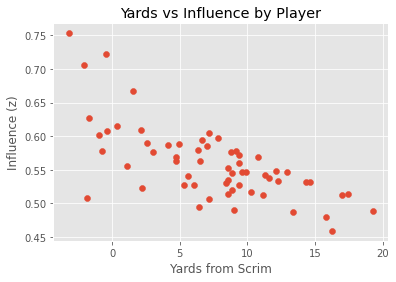

In [108]:
grouped = test.groupby('displayname')[['position', 'z', 'xmod']].agg({'position':['count', 'max'], 'z':'mean', 'xmod':'mean'})
grouped = grouped[grouped[('position', 'count')] > 5]

plt.scatter(grouped['xmod'], grouped['z'])
plt.xlabel('Yards from Scrim')
plt.ylabel('Influence (z)')
plt.title('Yards vs Influence by Player')
plt.show()

In [72]:
grouped.sort_values(by = ('xmod', 'mean'), ascending = False).head()

z            xmod           
                count      mean count       mean
displayname                                     
Kelvin Benjamin     7  0.488290     7  19.289286
Marvin Jones        8  0.514017     8  17.421875
Robert Woods        9  0.511745     9  17.022778
Allen Robinson      7  0.458800     7  16.260000
Julio Jones        19  0.479062    19  15.782895